In [1]:
%%capture
%cd ..

In [2]:
import pandas as pd
from utils import constants as cs
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('dataset/cleaned/charge-CS2_35.csv')

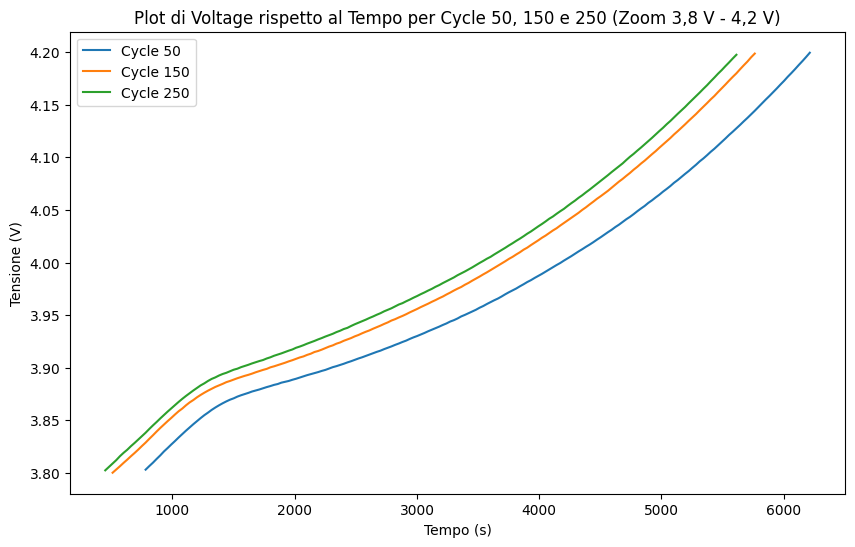

In [21]:
# Seleziona solo le righe con Cycle_Index pari a 50, 150 e 250 e Step_Index pari a 2
selected_cycles = df[(df['Cycle_Index'].isin([50, 150, 250])) & (df['Step_Index'] == 2)]

# Filtra ulteriormente per tensioni comprese tra 3.8 V e 4.2 V
selected_cycles = selected_cycles[(selected_cycles['Voltage(V)'] >= 3.8) & (selected_cycles['Voltage(V)'] <= 4.2)]

# Fai il plot
plt.figure(figsize=(10, 6))  # Specifica le dimensioni della figura (opzionale)
for cycle, group in selected_cycles.groupby('Cycle_Index'):
    plt.plot(group['Step_Time(s)'], group['Voltage(V)'], label=f'Cycle {cycle}')

plt.xlabel('Tempo (s)')
plt.ylabel('Tensione (V)')
plt.title('Plot di Voltage rispetto al Tempo per Cycle 50, 150 e 250 (Zoom 3,8 V - 4,2 V)')
plt.legend()  # Aggiungi la legenda
plt.show()

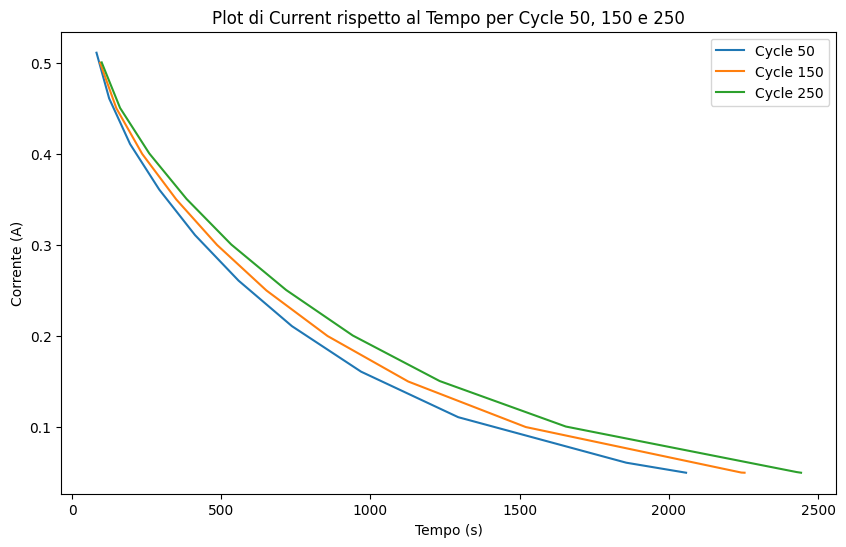

In [22]:
# Seleziona solo le righe con Cycle_Index pari a 50, 150 e 250 e Step_Index pari a 2
selected_cycles = df[(df['Cycle_Index'].isin([50, 150, 250])) & (df['Step_Index'] == 4)]

# Filtra ulteriormente per tensioni comprese tra 3.8 V e 4.2 V
selected_cycles = selected_cycles[(selected_cycles['Current(A)'] >= 0.0) & (selected_cycles['Current(A)'] <= 1.5)]

# Fai il plot
plt.figure(figsize=(10, 6))  # Specifica le dimensioni della figura (opzionale)
for cycle, group in selected_cycles.groupby('Cycle_Index'):
    plt.plot(group['Step_Time(s)'], group['Current(A)'], label=f'Cycle {cycle}')

plt.xlabel('Tempo (s)')
plt.ylabel('Corrente (A)')
plt.title('Plot di Current rispetto al Tempo per Cycle 50, 150 e 250')
plt.legend()  # Aggiungi la legenda
plt.show()

C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_52492\1206497571.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[   810.41104018   1650.83715667   2521.27847695   3421.73513879
   4352.20689273   5312.69394597   6303.19619807   7323.71354117
   8374.24607441   9454.79395038  10565.35690244  11705.93540123
  12876.52873108  14077.13729175  15307.76101252  16568.39995014
  17859.05407599  19179.72339603  20530.40842165  21911.10816963
  23321.8114397   24762.52597861  26233.25565389  27734.00055744
  29264.7606385   30825.53590832  32416.32638679  34037.1320286
  35687.95291935  37368.78896757  39079.6403488   40820.50678565
  42591.38843601  44392.28524072  46223.19722829  48084.12440894
  49975.06679913  51896.02440293  53846.99716428  55827.9852385
  57838.98839112  59880.00684987  61951.04036619  64052.08912909
  66183.15337507  68344.23243608  70535.32670017  72756.43614296
  75007.56079075  77288.70073464  

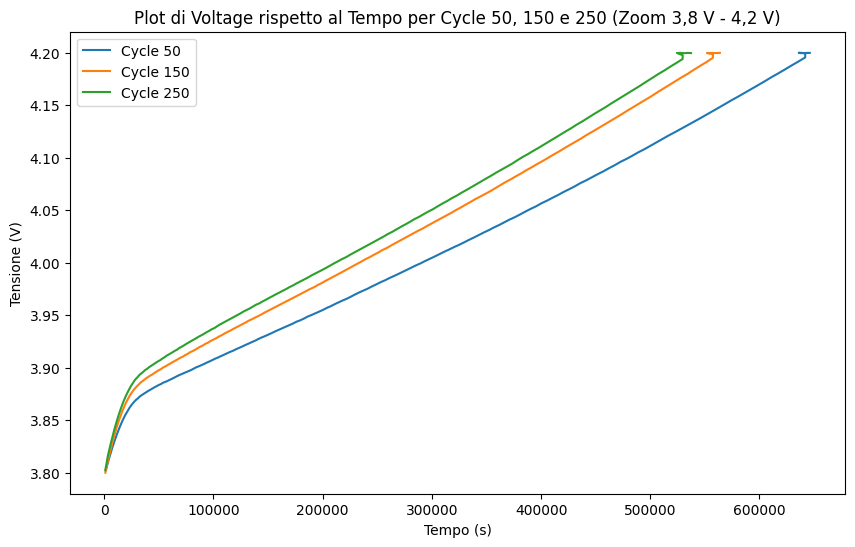

In [6]:
selected_cycles = df[(df['Cycle_Index'].isin([50, 150, 250]))]

# Filtra ulteriormente per tensioni comprese tra 3.8 V e 4.2 V
selected_cycles = selected_cycles[(selected_cycles['Voltage(V)'] >= 3.8) & (selected_cycles['Voltage(V)'] <= 4.2)]

# Identifica gli indici di riga in cui Step_Index passa da 2 a 4 per ciascun ciclo
transition_indices = selected_cycles[selected_cycles['Step_Index'].diff() == 2].index

# Aggiungi una colonna 'Adjusted_Step_Time' che tiene traccia della somma degli Step_Time(s) successivi a Step_Index 4
selected_cycles['Adjusted_Step_Time'] = 0

for idx in transition_indices:
    cycle_mask = selected_cycles['Cycle_Index'] == selected_cycles.at[idx, 'Cycle_Index']
    selected_cycles.loc[cycle_mask, 'Adjusted_Step_Time'] = selected_cycles[cycle_mask]['Step_Time(s)'].shift(-1).cumsum()

# Fai il plot
plt.figure(figsize=(10, 6))  # Specifica le dimensioni della figura (opzionale)
for cycle, group in selected_cycles.groupby('Cycle_Index'):
    plt.plot(group['Step_Time(s)'] + group['Adjusted_Step_Time'], group['Voltage(V)'], label=f'Cycle {cycle}')

plt.xlabel('Tempo (s)')
plt.ylabel('Tensione (V)')
plt.title('Plot di Voltage rispetto al Tempo per Cycle 50, 150 e 250 (Zoom 3,8 V - 4,2 V)')
plt.legend()  # Aggiungi la legenda
plt.show()